# Quantum Hall effect and disorder 

## Magnetic field

### What does a magnetic field do to electrons?

Electrons in a magnetic field experience the Lorentz force, effectively forcing electrons onto circular cyclotron orbits. Hence, electrons in a strong enough magnetic field do not move forward any more. The only exception are electrons near a boundary: the reflection from the boundary leads to so-called skipping orbits where electrons can effectively flow along a boundary (see figure below)

<img src="images/edge_channels.svg" style="width: 40%">

This is a completely classical picture, but it turns out this picture can be also used to understand quantum. In particular, in a magnetic field, electrons in the bulk get localized (and form the so-called Landau levels). At the boundaries of the system we then find quantum Hall edge states. These are localized towards the boundary, and only flow in one direction, just as the skipping orbits. The stronger the magnetic field, the smaller the cyclotron orbits, and the more localized the edge states are to the boundary.

### Magnetic field and tight-binding

The Lorentz force enters quantum mechanics through the magnetic vector potential, given by

$$\mathbf{B} = \nabla \times \mathbf{A}$$

For a constant magnetic field $B$ in $z$-direction (perpendicular to the 2DEG), we can thus choose

$$\mathbf{A} = \begin{pmatrix}-B y\\0\\0\end{pmatrix}$$

The vector potential enters in the tight-binding model as a so-called Peier's phase,
where we replace a hopping $t_{ij}$ as

$$t_{ij} \rightarrow t_{ij} \times \exp\left(i \frac{e}{\hbar} \int_{\mathbf{x}_j}^{\mathbf{x}_i} \mathbf{A}(\mathbf{x}) d\mathbf{s}\right)$$

For our 2D square lattice model this is easy to solve, and we find that all hoppings
must be multiplied with a phase

$$\exp\left(i\, \frac{e}{\hbar} B \frac{(y_i + y_j)}{2} (x_i-x_j)\right)$$

Note that we can rewrite this as 

$$
\exp\left(i\, 2 \pi \frac{\phi}{\phi_0} \frac{(y_i + y_j)(x_i-x_j)}{2a^2} \right)
$$

where $\phi = B a^2$ is the flux through a unit cell in the square lattice, and $\phi_0 = h/e$ the flux quantum.

### Some subtleties with regards to transport

You have seen that a lead has to have a translational symmetry. Only then can we define propagating modes!

For a magnetic field in the $z$-direction, we can have different choices for the vector potential. For example, as above,

$$\mathbf{A} =\begin{pmatrix}-B y\\0\\0\end{pmatrix}$$
or
$$\mathbf{A} =\begin{pmatrix}0\\B x\\0\end{pmatrix}$$

Now imagine I have a lead in $x$-direction: then the second choice breaks translational symmetry!

In order to compute transport, we thus always have to choose a vector potential that *preserves* the translational symmetry of the lead. It turns out that this always means that the 
vector potential must point along the direction of the lead.

## Disorder

Disorder enters the Hamiltonian as a disorder potential $V_\text{dis}$. There are various models for such potentials. A very commonly used model is to add a random on-site potential to the tight-binding model:

$$V_\text{dis} = \sum_i U_i |\mathbf{x}_i\rangle \langle \mathbf{x}_i|$$

where the $U_i$ are choosen randomly from a uniform distribution $[-U_0/2, U_0/2]$.

It is worth noting that the disorder strength $U_0$ by itself does not mean much. Instead
one must quantify the disorder strength by an physical quantitiy. For disorder this is the 
mean free path. From Fermi's golden rule one can compute that for this model

$$l_\text{mfp} = 48 a\, \frac{\sqrt{E/t}}{(U_0/t)^2}$$

where $a$ is again the lattice constant, $t$ the hopping energy on the square lattice.


## Making the kwant system

Let's the the magnetic field in action in a kwant system:

In [1]:
import kwant
from kwant.digest import uniform    # a (deterministic) pseudorandom number generator

In [2]:
%run matplotlib_setup.ipy

import numpy as np
from cmath import exp
from types import SimpleNamespace

Particular about this example is that we have now both the onsite energies and the hoppings position-dependent. Hence, we need to define functions for both:

In [3]:
lat = kwant.lattice.square(a=1)

t = 1
W = 30
L = 50

def onsite(site, params):
    return  params.U0 * (uniform(repr(site), repr(params.salt)) - 0.5) + 4 * t

def hopping(site_i, site_j, params):
    xi, yi = site_i.pos
    xj, yj = site_j.pos
    return -exp(-0.5j * params.phi * (xi - xj) * (yi + yj))

sys = kwant.Builder()
sys[(lat(x, y) for x in range(L) for y in range(W))] = onsite
sys[lat.neighbors()] = hopping

lead = kwant.Builder(kwant.TranslationalSymmetry([-1, 0]))
lead[(lat(0, y) for y in range(W))] = 4 * t   # no disorder in lead!
lead[lat.neighbors()] = hopping

sys.attach_lead(lead)
sys.attach_lead(lead.reversed())

sys = sys.finalized()

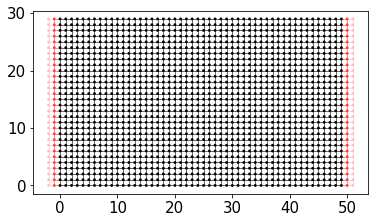

In [4]:
kwant.plot(sys);

#### Formation of edge channels

Let's first show how the Landau levels are formed by cranking up the magnetic field. We will plot the sum of all the wave function probabilities of all 

In [5]:
from ipywidgets import interact

/Users/nagydaniel/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  import sys
/Users/nagydaniel/miniconda3/lib/python3.6/site-packages/kwant/solvers/common.py:164: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  params=params)[:2]
/Users/nagydaniel/miniconda3/lib/python3.6/site-packages/kwant/solvers/common.py:191: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  prop, stab = lead.modes(energy, args, params=params)
/Users/nagydaniel/miniconda3/lib/python3.6/site-packages/kwant/system.py:305: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a 

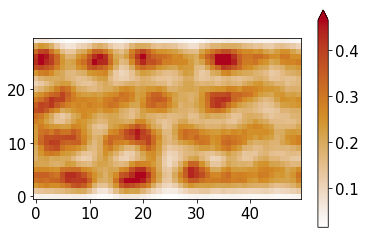

/Users/nagydaniel/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  import sys
/Users/nagydaniel/miniconda3/lib/python3.6/site-packages/kwant/solvers/common.py:164: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  params=params)[:2]
/Users/nagydaniel/miniconda3/lib/python3.6/site-packages/kwant/solvers/common.py:191: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  prop, stab = lead.modes(energy, args, params=params)
/Users/nagydaniel/miniconda3/lib/python3.6/site-packages/kwant/system.py:305: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a 

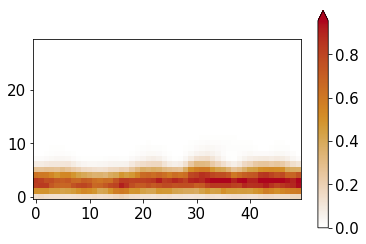

In [8]:
U0 = 0.3
salt = 13
energy = 0.2

def plot_wf(phi=0):
    params = SimpleNamespace(phi=phi, U0=U0, salt=salt)
    wfs = kwant.wave_function(sys, energy=energy, args=[params])
    scattering_wf = wfs(0)  # all scattering wave functions from lead 0
    kwant.plotter.map(sys, np.sum(abs(scattering_wf)**2, axis=0));

plot_wf(0)
plot_wf(0.15)

One can clearly see how the wave function is very unstructured without a magnetic field. With $B$, the wave functon is forced towards one side of the wire!

If you look very closely, you however see that this does not happen uniformily. There are
always values of ``phi`` where the wave function starts to spread again into the whole system, although it was already localized to an edge!

The reason for this "spreading" is that for these magnetic field values we have Landau level close to our energy. The finite disorder broadens the Landau level, giving rise to a bulk conductance.

We can observe this clearly if we correlate the band structure with the wave function plots:

/Users/nagydaniel/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  import sys
/Users/nagydaniel/miniconda3/lib/python3.6/site-packages/kwant/solvers/common.py:164: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  params=params)[:2]
/Users/nagydaniel/miniconda3/lib/python3.6/site-packages/kwant/solvers/common.py:191: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  prop, stab = lead.modes(energy, args, params=params)
/Users/nagydaniel/miniconda3/lib/python3.6/site-packages/kwant/system.py:305: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a 

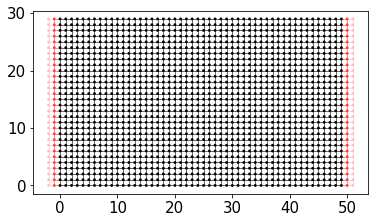

In [10]:
U0 = 0.3
salt = 13
energy = 0.2

def plot_wf(phi=0):
    params = SimpleNamespace(phi=phi, U0=U0, salt=salt)
    wfs = kwant.wave_function(sys, energy=energy, args=[params])
    scattering_wf = wfs(0)  # all scattering wave functions from lead 0
    
    fig = plt.Figure(figsize=(15,7))
    ax1 = fig.add_subplot(121)
    kwant.plotter.bands(sys.leads[0], args=[params], ax=ax1)
    ax1.set_ylim(0, 0.3)
    ax1.set_xlim(-3, 3)
    ax1.plot([-4,4], [energy]*2, "k--")
    ax2 = fig.add_subplot(122)
    kwant.plotter.map(sys, np.sum(abs(scattering_wf)**2, axis=0), ax=ax2)
    kwant.plotter.plot(sys)
    
plot_wf(0)

#### Edge states in transport

Without disorder, we have seen that the conductance of a wire is quantized to the number
of modes in the wire. With disorder, there is scattering, and the conductance will be smaller than the clean wire case.

Increasing the magnetic field reduces scattering due to the formation of quantum Hall
edge channels. Hence, we recover conductance quantization:

/Users/nagydaniel/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0, 'phi')

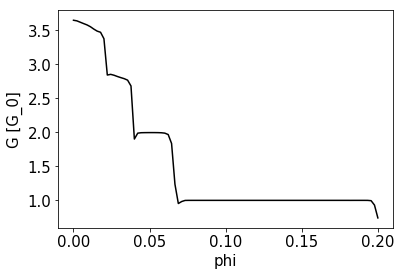

In [12]:
energy = 0.2
U0 = 0.3
salt = 13

phis = np.linspace(0, 0.2, 91)

Gs = []

for phi in phis:
    params = SimpleNamespace(phi=phi, U0=U0, salt=salt)
    smat = kwant.smatrix(sys, energy=energy, args=[params])
    Gs.append(smat.transmission(1, 0))
    
plt.plot(phis, Gs);
plt.ylabel("G [G_0]")
plt.xlabel("phi")

Note how well-defined conductance plateaus form as the magnetic field is increased! 

You might ask, why overall conductance goes down: This is due to the Landau level degeneracy and spacing increasing with magnetic field. Hence, for larger field less Landau levels are occupied. As the number of Landau levels determines also the number of edge channels, we have less edge channels for increasing magnetic field

## Your turn!

- add some more structure to the problem, for example by using a more interesting shape. Combine this example with the quantum point contact from the previous tutorial!
- write a function that computes the disorder strength necessary to obtain a given mean free path. Use this to choose different disorder strengths and see what happens to the wave function.
- *(probably too long for during the tutorial, but a nice exercise)* Knowing the connection
  between mean free path 
  $l_\text{mfp}$ and disorder strength $U_0$, check the dependence of the conductance at 
  zero magnetic field on the mean free path. In particular, you should (roughly) find
  
  $$ G = \frac{N}{1 + \frac{2}{\pi} \frac{L}{l_\text{mfp}}} $$
  
  where $N$ is the number of channels in the (clean) wire, and $L$ the wire length (see
  Beenakker, Rev. Mod. Phys. 69, 731 (1997). The factor $\frac{2}{\pi}$ is particular for
  2D)